# Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libaray

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Read in Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Credit Card Defaulter Prediction.csv')

# Features Describe
PAY0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight - months, 9=payment delay for nine months and above) 

PAY2: Repayment status in August, 2005 (scale same as above)

PAY3: Repayment status in July, 2005 (scale same as above)

PAY4: Repayment status in June, 2005 (scale same as above)

PAY5: Repayment status in May, 2005 (scale same as above)

PAY6: Repayment status in April, 2005 (scale same as above)

BILLAMT1: Amount of bill statement in September, 2005 (NT dollar) 

BILLAMT2: Amount of bill statement in August, 2005 (NT dollar)

BILLAMT3: Amount of bill statement in July, 2005 (NT dollar) 

BILLAMT4: Amount of bill statement in June, 2005 (NT dollar)

BILLAMT5: Amount of bill statement in May, 2005 (NT dollar) 

BILLAMT6: Amount of bill statement in April, 2005 (NT dollar)

PAYAMT1: Amount of previous payment in September, 2005 (NT dollar) 

PAYAMT2: Amount of previous payment in August, 2005 (NT dollar)

PAYAMT3: Amount of previous payment in July, 2005 (NT dollar) 

PAYAMT4: Amount of previous payment in June, 2005 (NT dollar)

PAYAMT5: Amount of previous payment in May, 2005 (NT dollar) 

PAYAMT6: Amount of previous payment in April, 2005 (NT dollar)

# Check Data

# the unique count of default

In [ ]:
data['default '].value_counts() 

N    23364
Y     6636
Name: default , dtype: int64

In [ ]:
data.shape

(30000, 25)

In [ ]:
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
5,6,50000,M,Graduate school,Single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,N
6,7,500000,M,Graduate school,Single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,N
7,8,100000,F,University,Single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,N
8,9,140000,F,High School,Married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,N
9,10,20000,M,High School,Single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,N


In [ ]:
data = data.drop(columns = ["ID"], axis = 1) # ID is useless in such case

In [ ]:
data.info() # Getting the data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64 
 5   PAY_0      30000 non-null  int64 
 6   PAY_2      30000 non-null  int64 
 7   PAY_3      30000 non-null  int64 
 8   PAY_4      30000 non-null  int64 
 9   PAY_5      30000 non-null  int64 
 10  PAY_6      30000 non-null  int64 
 11  BILL_AMT1  30000 non-null  int64 
 12  BILL_AMT2  30000 non-null  int64 
 13  BILL_AMT3  30000 non-null  int64 
 14  BILL_AMT4  30000 non-null  int64 
 15  BILL_AMT5  30000 non-null  int64 
 16  BILL_AMT6  30000 non-null  int64 
 17  PAY_AMT1   30000 non-null  int64 
 18  PAY_AMT2   30000 non-null  int64 
 19  PAY_AMT3   30000 non-null  int64 
 20  PAY_AMT4   30000 non-null  i

In [ ]:
# DataFrame.isnull() returns a boolean same-sized object if the values are NA(True).
null_values = (data.isnull().sum()) #*100/len(data) would only change it to float64, useless
null_values

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [ ]:
# Generates descriptive statistics.
data_statistics = data.describe()
data_statistics = data_statistics.rename(index={'count': 'row_counts', '50%': 'median'})
data_statistics.drop(columns=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
row_counts,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
median,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


# Get Dummy Variables

In [ ]:
dummies = pd.get_dummies(data, columns = ['SEX', 'EDUCATION', 'MARRIAGE'])

In [ ]:
dummies.iloc[0:, 21:]

,SEX_F,SEX_M,EDUCATION_0,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_0,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single
0,1,0,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,1,0,0,1,0,0,0,0,1,0,0
29996,0,1,0,0,1,0,0,0,0,0,0,1
29997,0,1,0,0,0,0,1,0,0,0,0,1
29998,0,1,0,0,1,0,0,0,0,1,0,0


In [ ]:
import warnings 
# ignore and never print any matching warnings, why??
warnings.filterwarnings(action= 'ignore')
# Change all defaults into 0 and 1 as well
dummies.loc[dummies['default '] == 'Y', 'default '] = 1
dummies.loc[dummies['default '] == 'N', 'default '] = 0

dummies = dummies.astype('int')

In [ ]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   AGE                        30000 non-null  int64
 2   PAY_0                      30000 non-null  int64
 3   PAY_2                      30000 non-null  int64
 4   PAY_3                      30000 non-null  int64
 5   PAY_4                      30000 non-null  int64
 6   PAY_5                      30000 non-null  int64
 7   PAY_6                      30000 non-null  int64
 8   BILL_AMT1                  30000 non-null  int64
 9   BILL_AMT2                  30000 non-null  int64
 10  BILL_AMT3                  30000 non-null  int64
 11  BILL_AMT4                  30000 non-null  int64
 12  BILL_AMT5                  30000 non-null  int64
 13  BILL_AMT6                  30000 non-null  int64
 14  PAY_AMT1              

# Best subset selection

Best subset selection is a method that aims to find the subset of independent variables (Xi) that best predict the outcome (Y) and it does so by considering all possible combinations of independent variables.

Step 1: Consider all possible models

Step 2: Identify the best model of each size

Step 3: Identify the best overall model

# Import Libaray

In [ ]:
import itertools
import time
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from tqdm import tnrange, tqdm_notebook

%matplotlib inline
plt.style.use('ggplot') # something similar to matploblib

# Helper function for fitting linear regression (Sklearn)

Linear regression:

is a measurement that helps determine the strength of the relationship between a dependent variable and one or more other factors, known as independent or explanatory variables.

Residual sum of squares:

The smaller the residual sum of squares, the better your model fits your data; the greater the residual sum of squares, the poorer your model fits your data. 

Helper function:

a function that performs part of the computation of another function following the DRY (Don't repeat yourself) concept.


It takes very long time to finish the step (about 6 hours)

In [ ]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y) # RSS = Residual Sum of Squares --> absolute amount of variance (residue) not explained by the regression model.
    R_squared = model_k.score(X,Y) # R_Squared = the absoute amount of variation as a proportion of total variation.
    return RSS, R_squared

In [ ]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = dummies["default "] # default = y
X = dummies.drop(columns = ["default "], axis = 1)
k = 11 # what the hell is k???
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'): # X.culumns = 33 (after drop and dummies) + 1(end_range-1), desc=description??? (Have progress bar)

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k): # used to creation of iterators which helps us in efficient looping in terms of space as well as time.
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists (Append each RSS per column into the list)
        R_squared_list.append(tmp_result[1])            #Append lists (Append each R_squared per column into the list)
        feature_list.append(combo) # combinations list per columns
        numb_features.append(len(combo))   

#Store in DataFrame
BestModule = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

Loop...:   0%|          | 0/32 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

# Finding the best subsets for each number of features
Using the smallest RSS value(predicted outcome with less error), or the largest R_squared value (largest percentage of variance)

In [ ]:
BestModule_min = BestModule[BestModule.groupby('numb_features')['RSS'].transform(min) == BestModule['RSS']] # get the minimum of column 'RSS' for each 'numb_features' group using transform
BestModule_max = BestModule[BestModule.groupby('numb_features')['R_squared'].transform(max) == BestModule['R_squared']]
display(BestModule_min.head(3))
display(BestModule_max.head(3))

NameError: ignored

# Adding columns to the dataframe with RSS and R squared values of the best subset

In [ ]:
BestModule['min_RSS'] = BestModule.groupby('numb_features')['RSS'].transform(min)
BestModule['max_R_squared'] = BestModule.groupby('numb_features')['R_squared'].transform(max)
BestModule.head() #returns the first 5 rows

# Plotting the best subset selection process

NameError: ignored

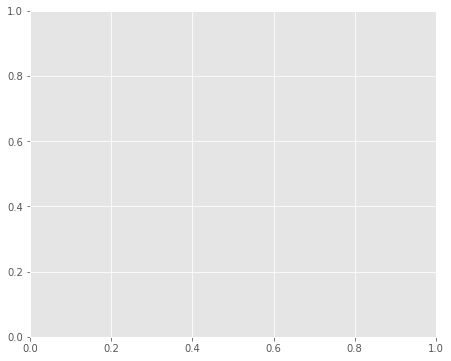

In [ ]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(BestModule.numb_features,BestModule.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(BestModule.numb_features,BestModule.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(BestModule.numb_features,BestModule.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(BestModule.numb_features,BestModule.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

# Forward stepwise selection
Forward selection is a type of stepwise regression which begins with an empty model and adds in variables one by one.

In [ ]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = dummies["default "]
X = dummies.drop(columns = ["default "], axis = 1)
k = 32

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [ ]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
# display([(i,features_list[i], round(RSS_list[i])) for i in range(1,33)])
print(features_list)
print(RSS_list)

# create rounded list of RSS
rounded_RSS_list = []
for j in range(1,33):
    rounded_RSS_list.append(round(RSS_list[j]))
print(rounded_RSS_list)

rounded_RSS_min = min(rounded_RSS_list)
print(rounded_RSS_min)

min_RSS_list = []
for k in range(0, len(rounded_RSS_list)): # len(rounded_RSS_list) = 32
    if rounded_RSS_list[k] == rounded_RSS_min:
        min_RSS_list.append(k+1) # rounded_RSS_list starts at index 0 instad of index 1
print(min_RSS_list)

display([features_list[l] for l in min_RSS_list]) # min_RSS_list = [26, 27, 28, 29, 30, 31, 32]

Forward stepwise subset selection
Number of features | Features | RSS
{1: ['PAY_0'], 2: ['PAY_0', 'BILL_AMT1'], 3: ['PAY_0', 'BILL_AMT1', 'PAY_2'], 4: ['PAY_0', 'BILL_AMT1', 'PAY_2', 'MARRIAGE_Married'], 5: ['PAY_0', 'BILL_AMT1', 'PAY_2', 'MARRIAGE_Married', 'PAY_3'], 6: ['PAY_0', 'BILL_AMT1', 'PAY_2', 'MARRIAGE_Married', 'PAY_3', 'PAY_AMT1'], 7: ['PAY_0', 'BILL_AMT1', 'PAY_2', 'MARRIAGE_Married', 'PAY_3', 'PAY_AMT1', 'EDUCATION_Unknown'], 8: ['PAY_0', 'BILL_AMT1', 'PAY_2', 'MARRIAGE_Married', 'PAY_3', 'PAY_AMT1', 'EDUCATION_Unknown', 'LIMIT_BAL'], 9: ['PAY_0', 'BILL_AMT1', 'PAY_2', 'MARRIAGE_Married', 'PAY_3', 'PAY_AMT1', 'EDUCATION_Unknown', 'LIMIT_BAL', 'AGE'], 10: ['PAY_0', 'BILL_AMT1', 'PAY_2', 'MARRIAGE_Married', 'PAY_3', 'PAY_AMT1', 'EDUCATION_Unknown', 'LIMIT_BAL', 'AGE', 'SEX_F'], 11: ['PAY_0', 'BILL_AMT1', 'PAY_2', 'MARRIAGE_Married', 'PAY_3', 'PAY_AMT1', 'EDUCATION_Unknown', 'LIMIT_BAL', 'AGE', 'SEX_F', 'EDUCATION_Graduate school'], 12: ['PAY_0', 'BILL_AMT1', 'PAY_2', 'MARRI

[['PAY_0',
  'BILL_AMT1',
  'PAY_2',
  'MARRIAGE_Married',
  'PAY_3',
  'PAY_AMT1',
  'EDUCATION_Unknown',
  'LIMIT_BAL',
  'AGE',
  'SEX_F',
  'EDUCATION_Graduate school',
  'PAY_5',
  'PAY_AMT2',
  'EDUCATION_Others',
  'MARRIAGE_0',
  'BILL_AMT2',
  'PAY_AMT5',
  'PAY_AMT4',
  'EDUCATION_0',
  'PAY_AMT6',
  'PAY_4',
  'BILL_AMT6',
  'MARRIAGE_Single',
  'BILL_AMT4',
  'EDUCATION_High School',
  'BILL_AMT3'],
 ['PAY_0',
  'BILL_AMT1',
  'PAY_2',
  'MARRIAGE_Married',
  'PAY_3',
  'PAY_AMT1',
  'EDUCATION_Unknown',
  'LIMIT_BAL',
  'AGE',
  'SEX_F',
  'EDUCATION_Graduate school',
  'PAY_5',
  'PAY_AMT2',
  'EDUCATION_Others',
  'MARRIAGE_0',
  'BILL_AMT2',
  'PAY_AMT5',
  'PAY_AMT4',
  'EDUCATION_0',
  'PAY_AMT6',
  'PAY_4',
  'BILL_AMT6',
  'MARRIAGE_Single',
  'BILL_AMT4',
  'EDUCATION_High School',
  'BILL_AMT3',
  'PAY_6'],
 ['PAY_0',
  'BILL_AMT1',
  'PAY_2',
  'MARRIAGE_Married',
  'PAY_3',
  'PAY_AMT1',
  'EDUCATION_Unknown',
  'LIMIT_BAL',
  'AGE',
  'SEX_F',
  'EDUCATION_Grad

# Our model should be
26 - 32 model with same RSS value(4522)

Those 6 variables are
'PAY_AMT3',
'BILL_AMT5',
'EDUCATION_University',
'SEX_M',
'MARRIAGE_Other'

We are going to use the full model


# Model set up

In [ ]:
features_dummies = dummies.drop(columns = ["default "], axis = 1)
outcomes_dummies = dummies["default "]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_dummies, outcomes_dummies, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42 ) 

# Split the data into Training and Testing

In [ ]:
features = X_train
targets = y_train
features_test = X_test
targets_test = y_test

print(features[:10])
print(targets[:10])

       LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
9922       60000   38      2      2      2      0      0      0      59310   
2156      290000   25      0      0      0      0      0      0     305823   
162       290000   47     -1     -1     -1     -1      0     -1       1234   
1463      300000   50     -1     -1     -1      0      0      0       8924   
5624      210000   33      0      0      0      0      0      0     206409   
7988      200000   27     -2     -2     -2     -2     -2     -2        264   
29008     190000   40      0      0      0      0      0      0     124082   
16709     170000   39      0      0      0      0      0      0     138811   
23475     140000   31     -2     -2     -2     -2     -2     -2       1399   
22013      40000   27     -1      0      0     -1     -1      0      27025   

       BILL_AMT2  ...  EDUCATION_0  EDUCATION_Graduate school  \
9922       60482  ...            0                          1   
2156      3

# Train the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some useful functions.

In [ ]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

In [ ]:
# The error term formula
def error_term_formula(x, y, output):
    return (y - output)*(sigmoid_prime(x))

In [ ]:
# Neural network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            #   Notice we calulate f'(h) here instead of defining a separate
            #   sigmoid_prime function. This just makes it faster because we
            #   can re-use the result of the sigmoid function stored in
            #   the output variable
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.472254635013642
Epoch: 100
Train loss:  0.496051266623292   WARNING - Loss Increasing
Epoch: 200
Train loss:  0.52707868325027   WARNING - Loss Increasing
Epoch: 300
Train loss:  0.5893607281960692   WARNING - Loss Increasing
Epoch: 400
Train loss:  0.6713334674604541   WARNING - Loss Increasing
Epoch: 500
Train loss:  0.7151327030082175   WARNING - Loss Increasing
Epoch: 600
Train loss:  0.7266074216338856   WARNING - Loss Increasing
Epoch: 700
Train loss:  0.7342020517295239   WARNING - Loss Increasing
Epoch: 800
Train loss:  0.7419793445170455   WARNING - Loss Increasing
Epoch: 900
Train loss:  0.7465614961203614   WARNING - Loss Increasing
Finished training!


# Calculate the Accuracy on the Testing Data

In [ ]:
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.248


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The prediction accuracy on the training data is', train_accuracy)
print('The prediction accuracy on the testing data is', test_accuracy)

The prediction accuracy on the training data is 0.99953125
The prediction accuracy on the testing data is 0.7276666666666667


In [ ]:
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.82875
The test accuracy is 0.819


# LinearRegression()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(random_state = 42)
logistic.fit(X_train,y_train)

y_train_logistic_pred = logistic.predict(X_train)
y_test_logistic_pred = logistic.predict(X_test)

train_logistic_accuracy = accuracy_score(y_train, y_train_logistic_pred)
test_logistic_accuracy = accuracy_score(y_test, y_test_logistic_pred)

print('The training accuracy is', train_logistic_accuracy)
print('The test accuracy is', test_logistic_accuracy)



The training accuracy is 0.7784895833333333
The test accuracy is 0.781


# k nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train,y_train)

y_train_k_pred = k_neighbors.predict(X_train)
y_test_k_pred = k_neighbors.predict(X_test)

train_k_accuracy = accuracy_score(y_train, y_train_k_pred)
test_k_accuracy = accuracy_score(y_test, y_test_k_pred)

print('The training accuracy is', train_k_accuracy)
print('The test accuracy is', test_k_accuracy)

The training accuracy is 0.8165104166666667
The test accuracy is 0.7553333333333333


# Random forest classifier
# Random forest give the highest accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)

ye_train = random_forest.predict(X_train)
ye_test = random_forest.predict(X_test)

train_ye_accuracy = accuracy_score(y_train, ye_train)
test_ye_accuracy = accuracy_score(y_test, ye_test)

print('The training accuracy is', train_ye_accuracy)
print('The test accuracy is', test_ye_accuracy)

The training accuracy is 0.9994791666666667
The test accuracy is 0.8128333333333333


# plot the one decision tree

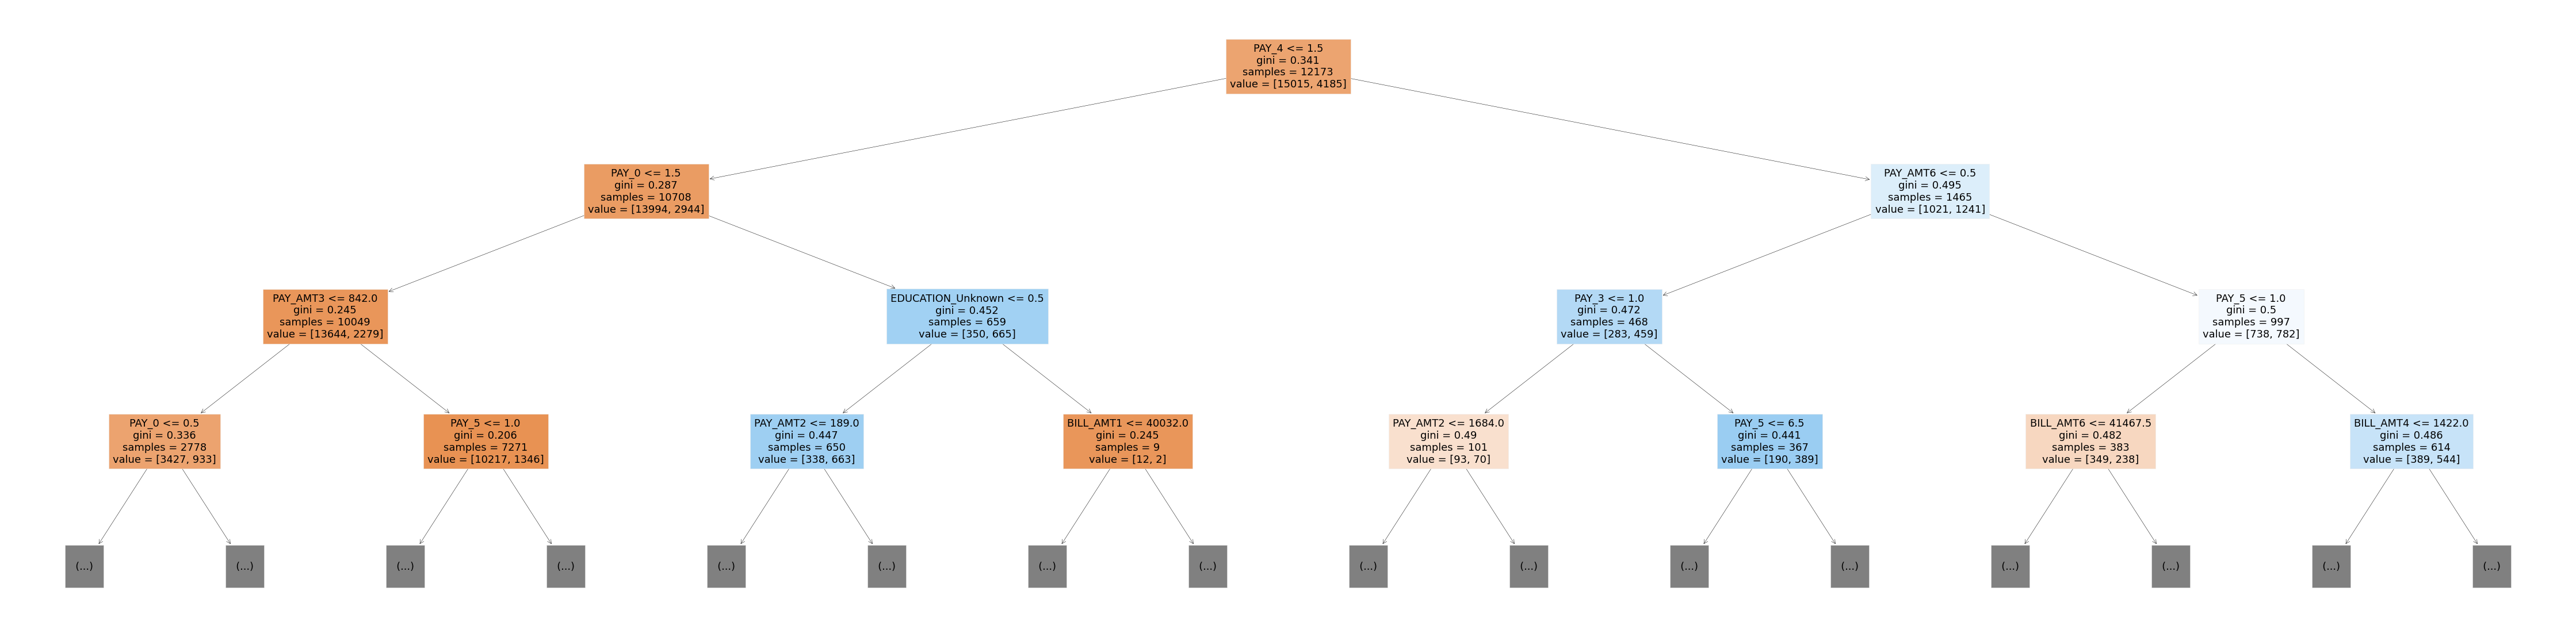

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))

random_forest.estimators_[4] 

plot_tree(random_forest.estimators_[0], feature_names = X_train.columns, max_depth = 3, filled = True);

Text(0.5, 1.0, 'Feature Importance')

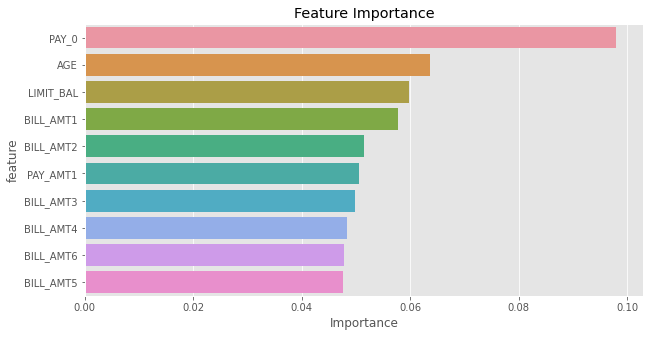

In [ ]:
importance_df = pd.DataFrame({'feature':X_train.columns,'Importance': random_forest.feature_importances_}).sort_values('Importance', ascending = False)

plt.figure(figsize=(10,5))

sns.barplot(data = importance_df.head(10), x = 'Importance', y = 'feature');
plt.title('Feature Importance')

# Testing n_estimators

In [ ]:
model1 = RandomForestClassifier(random_state = 42, n_jobs = 1, n_estimators = 100)
model1.fit(X_train, y_train)
model1.score(X_train, y_train), model1.score(X_val, y_val)

(0.9994791666666667, 0.8116666666666666)

In [ ]:
model1 = RandomForestClassifier(random_state = 42, n_jobs = 1, n_estimators = 300)
model1.fit(X_train, y_train)
model1.score(X_train, y_train), model1.score(X_val, y_val)

(0.99953125, 0.8127083333333334)

In [ ]:
model1 = RandomForestClassifier(random_state = 42, n_jobs = 1, n_estimators = 500)
model1.fit(X_train, y_train)
model1.score(X_train, y_train), model1.score(X_val, y_val)

(0.99953125, 0.8125)

# Testing max depth

In [ ]:
def test_params(**params):
    model2 = RandomForestClassifier(random_state = 42, n_jobs = 1, **params).fit(X_train, y_train)
    return model2.score(X_train, y_train), model2.score(X_val, y_val)

In [ ]:
test_params(max_depth = 10)

(0.86265625, 0.8141666666666667)

In [ ]:
test_params(max_depth = 20)

(0.9530208333333333, 0.8139583333333333)

In [ ]:
test_params(max_depth = 30)

(0.9984375, 0.8129166666666666)

# Testing max_leaf_nodes

In [ ]:
test_params(max_leaf_nodes = 2**5)

(0.8255729166666667, 0.814375)

In [ ]:
test_params(max_leaf_nodes = 2**10)

(0.9068229166666667, 0.813125)

In [ ]:
test_params(max_leaf_nodes = 2**15)

(0.99953125, 0.811875)

# Testing max_features

In [ ]:
test_params(max_features = 'log2')

(0.9994791666666667, 0.8116666666666666)

In [ ]:
test_params(max_features = 5)

(0.9994791666666667, 0.8116666666666666)

In [ ]:
test_params(max_features = 15)

(0.9994791666666667, 0.81125)

# Testing min_samples_split and min_samples_leaf

In [ ]:
test_params(min_samples_split=100, min_samples_leaf=50)

(0.82609375, 0.8145833333333333)

In [ ]:
test_params(min_samples_split=150, min_samples_leaf=50)

(0.8247395833333333, 0.815)

In [ ]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8252604166666667, 0.8147916666666667)

In [ ]:
test_params(min_samples_split=150, min_samples_leaf=60)

(0.82484375, 0.8147916666666667)

# Final Model

In [ ]:
final_model = RandomForestClassifier(random_state = 42, n_jobs = 1, n_estimators = 300,
                     min_samples_split = 100, min_samples_leaf=60, max_features = 'log2',
                    max_leaf_nodes = 2**10,max_depth = 20  )
final_model.fit(X_train, y_train)
final_model.score(X_train, y_train), final_model.score(X_val, y_val)

(0.825, 0.814375)

# Result

In [ ]:
result = RandomForestClassifier(random_state = 42, n_jobs = 1, n_estimators = 300,
                     min_samples_split = 100, min_samples_leaf=60, max_features = 'log2',
                    max_leaf_nodes = 2**10,max_depth = 20  )
result.fit(X_train, y_train)
result.score(X_train, y_train), result.score(X_test, y_test)

NameError: ignored

In [ ]:
result_1 = RandomForestClassifier(random_state = 42, n_jobs = 1, n_estimators = 300,
                     min_samples_split = 100, min_samples_leaf=60, max_features = 'log2',
                    max_leaf_nodes = 2**10,max_depth = 20  )
result_1.fit(X_train, y_train)
yee = result_1.predict(X_train)
y_prede = result_1.predict(X_test)
accuracy_score(yee, y_train), accuracy_score(y_prede, y_test)

NameError: ignored

In [ ]:
``